In [4]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

In [5]:
joined_df = pd.read_csv('data/songs_with_features.csv')

In [6]:
joined_df.head()

,track,uri,album,artist,artist_uri,popularity,release_date,added_at,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genres,artist_popularity,duration_min
0,"Look So Good, Be So Good",spotify:track:4a0FM5gDxCenHiLS17Edvr,Freezing to Death,The Shivas,spotify:artist:2OZfuhYQm8IY95egVPC1U9,33,2010-04-01,2020-03-26T16:57:05Z,0.515,0.872,...,0.212,0.712000,0.1420,0.480,118.803,359800,4,"['indie garage rock', 'neo-psychedelic', 'port...",41,5.996667
1,El Condor Pasa (If I Could),spotify:track:1eN42Q7IWRzRBq8eW2Y2TE,Bridge Over Troubled Water,Simon & Garfunkel,spotify:artist:70cRZdQywnSFp9pnc2WTCE,62,1970-01-26,2020-03-06T23:43:34Z,0.330,0.214,...,0.836,0.070100,0.1780,0.275,147.795,187040,4,"['classic rock', 'folk', 'folk rock', 'melanch...",76,3.117333
2,Kathy's Song,spotify:track:4Acofe9hICRvyBTP5hFNk0,Sounds Of Silence,Simon & Garfunkel,spotify:artist:70cRZdQywnSFp9pnc2WTCE,54,1966-01-17,2019-04-17T23:52:38Z,0.431,0.188,...,0.900,0.000900,0.1220,0.487,102.039,197773,4,"['classic rock', 'folk', 'folk rock', 'melanch...",76,3.296217
3,I Am a Rock,spotify:track:0byOqNZN9ailhoORv5Ps0Z,Sounds Of Silence,Simon & Garfunkel,spotify:artist:70cRZdQywnSFp9pnc2WTCE,61,1966-01-17,2019-04-17T23:52:38Z,0.660,0.611,...,0.423,0.000011,0.1070,0.749,113.898,169520,4,"['classic rock', 'folk', 'folk rock', 'melanch...",76,2.825333
4,"Mrs. Robinson - From ""The Graduate"" Soundtrack",spotify:track:0iOZM63lendWRTTeKhZBSC,Bookends,Simon & Garfunkel,spotify:artist:70cRZdQywnSFp9pnc2WTCE,76,1968-04-03,2018-10-02T16:39:40Z,0.606,0.457,...,0.713,0.000025,0.0747,0.813,92.033,244027,4,"['classic rock', 'folk', 'folk rock', 'melanch...",76,4.067117


In [7]:
joined_df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_popularity,duration_min
count,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000
mean,30.190376,0.505176,0.623570,5.165564,-8.837362,0.709774,0.066125,0.296084,0.167453,0.220162,0.506533,120.947989,2.419725e+05,3.879549,63.485263,4.032874
std,20.604524,0.153569,0.234191,3.538600,4.590910,0.453901,0.092409,0.312634,0.290538,0.192347,0.248319,29.419335,1.281109e+05,0.461891,17.808177,2.135181
min,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.560000e+03,0.000000,0.000000,0.092667
25%,13.000000,0.399000,0.470000,2.000000,-10.701750,0.000000,0.032700,0.022125,0.000040,0.100000,0.317000,98.794750,1.787798e+05,4.000000,55.000000,2.979663
50%,33.000000,0.511000,0.657000,5.000000,-7.883000,1.000000,0.040900,0.167000,0.004260,0.138000,0.514000,119.750000,2.229600e+05,4.000000,67.000000,3.716000
75%,46.000000,0.611000,0.815000,9.000000,-5.838750,1.000000,0.060175,0.530000,0.182000,0.283000,0.706000,138.559750,2.744602e+05,4.000000,75.000000,4.574338
max,85.000000,0.968000,0.997000,11.000000,0.490000,1.000000,0.952000,0.996000,0.996000,0.994000,0.983000,215.895000,3.816373e+06,5.000000,94.000000,63.606217


In [1]:
joined_df.sort_values(by=['danceability'], ascending=False).head(20)

NameError: name 'joined_df' is not defined

/home/hgl/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/hgl/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/hgl/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/hgl/.local/lib/python3.7/site-packages/pandas/plottin

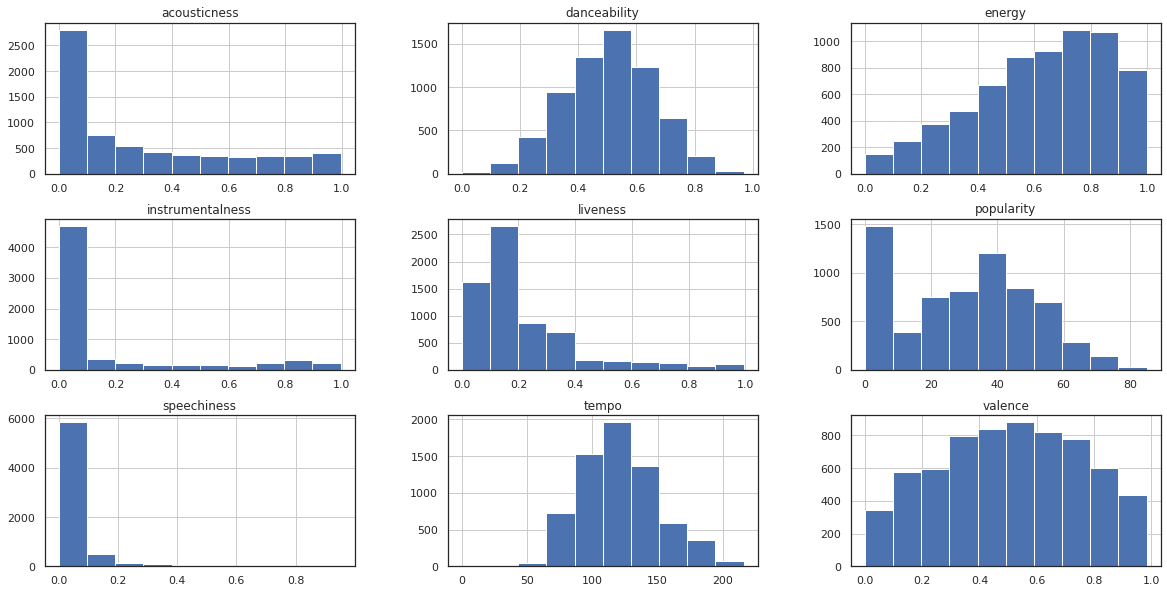

In [85]:
joined_df[['acousticness', 'danceability', 'instrumentalness', 
           'energy', 'speechiness','tempo','valence',
           'liveness', 'popularity']].hist(figsize=(20,10))
plt.show()

In [74]:
df_recent = joined_df
cluster_features = ['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness', 'popularity']
df_cluster = df_recent[cluster_features]
X = np.array(df_cluster)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

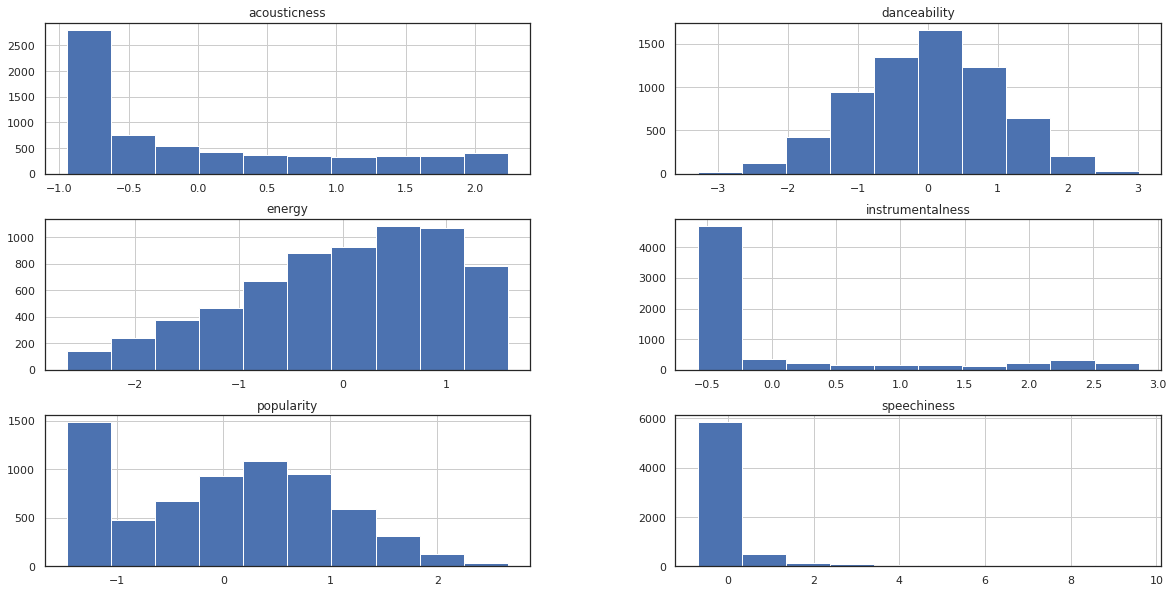

In [106]:
pd.DataFrame(data=X, columns=cluster_features).hist(figsize=(20,10))
plt.show()

In [75]:
ss_dist = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, max_iter=30000, init='k-means++', random_state=123)
    km = km.fit(X)
    ss_dist.append(km.inertia_)

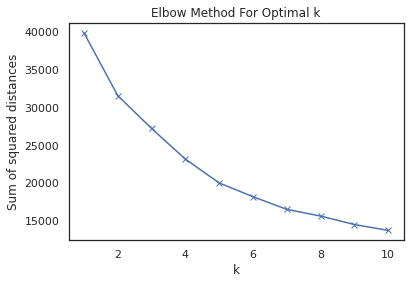

In [76]:
plt.plot(K, ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [77]:
num_clusters = 5
kmeanModel = KMeans(n_clusters=num_clusters, max_iter=20000, init='k-means++', random_state=123).fit(X)

In [97]:
tsne = TSNE(n_components=3, perplexity=100, n_iter=10000, random_state=123, learning_rate=1900)
tsne_results = tsne.fit_transform(X)

In [98]:

df_tsne = pd.DataFrame(tsne_results)
df_tsne.columns = ['D1', 'D2', 'D3']
df_tsne['label'] = kmeanModel.labels_
df_tsne.head()

,D1,D2,D3,label
0,7.305757,-8.667136,2.463745,0
1,-2.829180,-5.494130,-6.605556,3
2,7.258467,-10.027877,0.182120,0
3,-1.701754,10.216740,-6.338300,1
4,-2.740925,-0.389222,-6.537076,3


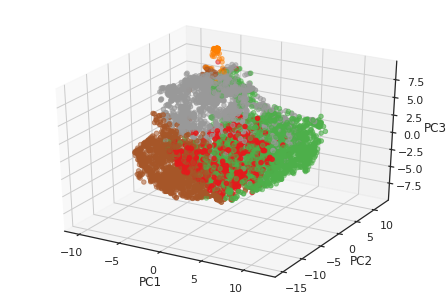

In [99]:
# sns.set_style('white')
# sns.scatterplot(data=df_tsne, x='D1', y='D2', hue='label', style='label', palette='Set1')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
# plt.title('Visualisation of Songs using TSNE')
# plt.show()
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df_tsne['D1'], df_tsne['D2'], df_tsne['D3'],
           c=df_tsne['label'], cmap='Set1')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

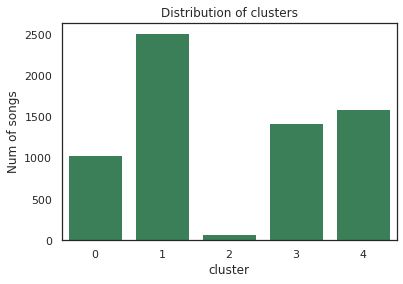

In [81]:
# assign label to recent dataframe
df_recent.loc[:,'cluster'] = kmeanModel.labels_
df_cluster_size = df_recent.groupby('cluster').size().reset_index(name='Num of songs')
sns.barplot(data=df_cluster_size, x='cluster', y='Num of songs', color='seagreen')
plt.title('Distribution of clusters')
plt.show()

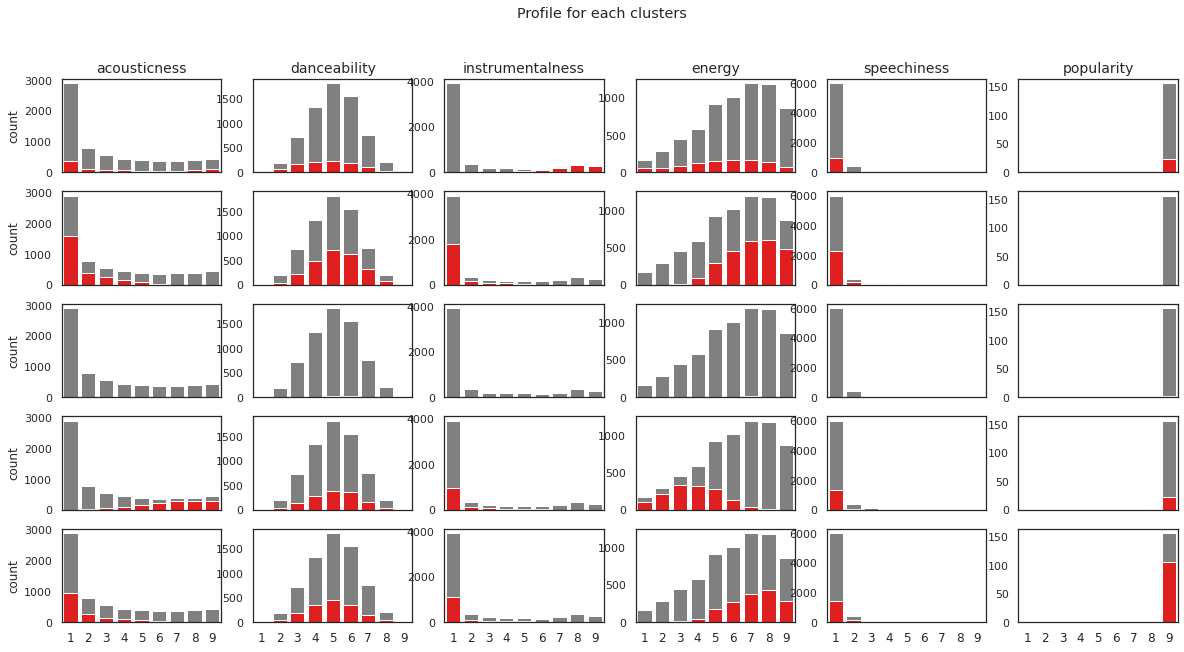

In [82]:
# set binning intervals of 0.1
bins = np.linspace(0,1,10)

# create subplots
num_features = len(cluster_features)
f, axes = plt.subplots(num_clusters, num_features, 
                       figsize=(20, 10), sharex='col')

# initialise 1st row. Representing cluster
row = 0
for cluster in np.sort(df_recent['cluster'].unique()):
#     filter cluster dataframe and reset column to 0 for 1st plot for the cluster
    df_cluster = df_recent[df_recent['cluster'] == cluster]
    col = 0
    
    for feature in cluster_features:
#         create binned count for all recent df and clustered df
        rec_grp = df_recent.groupby(pd.cut(df_recent[feature], bins)).size().reset_index(name='count')
        cluster_grp = df_cluster.groupby(pd.cut(df_cluster[feature], bins)).size().reset_index(name='count')
        
#         plot overall distribution and cluster distribution on the ax
        sns.barplot(data=rec_grp, x=feature, y='count', 
                    color='grey', ax=axes[row, col])
        sns.barplot(data=cluster_grp, x=feature, y='count', 
                    color='red', ax=axes[row, col])
        
#         configure ax
        axes[row, col].set_xlabel('')
        axes[row, col].set_xticklabels(range(1,10), fontsize=12)
        if col > 0:
            axes[row, col].set_ylabel('')
        else:
            axes[row, col].set_ylabel('count', fontsize=12)
        if row == 0:
            axes[row, col].set_title(feature, fontsize=14)        
        col += 1
    row += 1
    
f.suptitle('Profile for each clusters')
    
plt.show()

In [100]:
cluster_num = 0
df_cluster = df_recent[df_recent['cluster'] == cluster_num]

In [104]:
df_cluster.head(50)

,uri,artist,album,track,popularity,release_date,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,uri.1,duration_ms,time_signature,duration_min,cluster
0,spotify:track:4a0FM5gDxCenHiLS17Edvr,The Shivas,Freezing to Death,"Look So Good, Be So Good",33,2010-04-01,0.515,0.872,9,-8.466,...,0.212000,0.712,0.1420,0.4800,118.803,spotify:track:4a0FM5gDxCenHiLS17Edvr,359800,4,5.996667,0
2,spotify:track:4SzmBRbDVmi0z4Lnc6H1Za,Against All Logic,2012 - 2017,This Old House Is All I Have,56,2018-02-17,0.690,0.804,10,-6.288,...,0.312000,0.775,0.1710,0.4820,86.974,spotify:track:4SzmBRbDVmi0z4Lnc6H1Za,218960,4,3.649333,0
26,spotify:track:2HlBvuaKhdftTRb3TCklhQ,Dead Meadow,Dead Meadow,Sleepy Silver Door,41,2001,0.365,0.632,11,-6.574,...,0.444000,0.708,0.1270,0.2890,129.545,spotify:track:2HlBvuaKhdftTRb3TCklhQ,452747,4,7.545783,0
36,spotify:track:3NMVmvEQuLx2BFETr5DGFF,Parquet Courts,Wide Awake!,Back to Earth,39,2018-05-18,0.624,0.832,2,-4.432,...,0.019100,0.764,0.7240,0.4950,120.934,spotify:track:3NMVmvEQuLx2BFETr5DGFF,234293,4,3.904883,0
47,spotify:track:0h2gzJQBt6duqZD6kWiz4s,Led Zeppelin,Led Zeppelin II,Moby Dick,50,1969-10-22,0.492,0.446,7,-17.181,...,0.025000,0.874,0.5660,0.3560,112.818,spotify:track:0h2gzJQBt6duqZD6kWiz4s,260960,4,4.349333,0
63,spotify:track:0rFFMt1bqfrLLPKp0ULidT,Giovanni Battista Granata,Sonate Al Pizzico - Italian Duets for Plucked ...,"Sonata di chitarra, e violino, con basso continuo",4,2004-04-01,0.385,0.143,8,-21.795,...,0.990000,0.864,0.0903,0.1960,96.411,spotify:track:0rFFMt1bqfrLLPKp0ULidT,511733,4,8.528883,0
68,spotify:track:2lvfqIcLwDB1fQo9uMWmaL,3nd,World Tour,Monsoon,18,2009-09-02,0.235,0.862,9,-5.417,...,0.000042,0.819,0.0570,0.4000,102.437,spotify:track:2lvfqIcLwDB1fQo9uMWmaL,234507,3,3.908450,0
69,spotify:track:1NuglUilyR8Sb6HGYDv1zb,3nd,World Tour,China,17,2009-09-02,0.561,0.788,4,-7.014,...,0.000355,0.781,0.0858,0.9610,96.273,spotify:track:1NuglUilyR8Sb6HGYDv1zb,144013,3,2.400217,0
70,spotify:track:6iSdI7VC75vKb6CMoz3BjG,3nd,World Tour,Ssk,29,2009-09-02,0.284,0.847,9,-6.185,...,0.000009,0.725,0.1380,0.5060,93.058,spotify:track:6iSdI7VC75vKb6CMoz3BjG,253560,4,4.226000,0
71,spotify:track:7JV7vsNieNDJQiaLtKxZ5l,3nd,World Tour,Midroll,15,2009-09-02,0.488,0.632,7,-4.532,...,0.000329,0.843,0.0608,0.2300,120.553,spotify:track:7JV7vsNieNDJQiaLtKxZ5l,299867,4,4.997783,0
